<a href="https://colab.research.google.com/github/elyesaseidel/motion-to-emotion/blob/main/Justin/Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import 

In [5]:
!pip install SpeechRecognition
!pip install streamlit -q
!pip install pyngrok
!pip install ffmpeg-python
!pip install python-settings
!pip install synthesizer
# !pip install inference
# !pip install helper
!pip install SpeechRecognition moviepy
!pip3 install imageio==2.4.1
!pip install imageio-ffmpeg
!pip install --upgrade moviepy
# !pip install aspect-based-sentiment-analysis==1.1.0
!pip install deepface
!pip install nltk
!pip install neattext
!pip install librosa
!pip install streamlit-webrtc

from moviepy.audio.AudioClip import AudioClip
from moviepy.audio.io.readers import FFMPEG_AudioReader
import moviepy.editor as mp
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from deepface import DeepFace 
from collections import Counter
from pathlib import Path
import os
import glob
import cv2
import pickle
# import aspect_based_sentiment_analysis as absa
from pyngrok import ngrok
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import speech_recognition as sr
from google.colab import output
from base64 import b64decode
import base64
r = sr.Recognizer()

# from google.colab.output import eval_js
# from IPython.display import HTML, Javascript


# https://ngrok.com/ to sign in for free to get auth_key 
# Tutorial to run streamlit on colab
# https://www.youtube.com/watch?v=MUD-pBOnvdo 
ngrok.set_auth_token('2LC761bNPuCZchtb90lWWFD5sor_G1ecaAUAsAYDSjp6FTD5')

# mount your drive with colab notebook
drive.mount('/content/gdrive')

# # how to read data from google drive
# df = pd.read_csv('/content/gdrive/MyDrive/From Motion to Emotion/testing.csv')
# # save data to google drive
# path = '/content/gdrive/MyDrive/From Motion to Emotion/output.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df_alt.to_csv(f)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=cf2df9a098c85ada1c8c338a45b2f8fb92b508b0d3cdbb8f3e8b3e778d75f9a4
  Stored in directory: /root/.cache/pip/wheels/be/7b/04/4d8d56f1d503e5c404f0de6018c0cfa592c71588a39b49e002
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 53.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=b41714544a119a7cf06cbfff32e4c8bd62d174f41f95f7396b7b6d500a9627be
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 4.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-pyth

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Directory  /root /.deepface created
Directory  /root /.deepface/weights created
Mounted at /content/gdrive


# Streamlit code

Video resourse \
https://www.youtube.com/watch?v=y9Trdafp83U ('There's more to life than being happy | Emily Esfahani Smith') \
https://www.youtube.com/watch?v=KAJsdgTPJpU&t=1s ('Greta Thunberg's full speech to world leaders at UN Climate Action Summit')\
https://www.youtube.com/watch?v=wD2cVhC-63I ('Matthew McConaughey winning Best Actor | 86th Oscars (2014)')

In [57]:
%%writefile Motion_to_Emotion.py 
import streamlit as st 
from pyngrok import ngrok
from google.colab import drive
from google.colab import files
from google.colab import output
import pandas as pd
import speech_recognition as sr
import base64
from base64 import b64decode
import cv2
from deepface import DeepFace 
from collections import Counter
from pathlib import Path
import pickle
import os
import glob
from collections import Counter
from PIL import Image
import moviepy.editor as mp
r = sr.Recognizer()
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import numpy as np
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import librosa
import librosa.display
import matplotlib.pyplot as plt
from streamlit_webrtc import VideoTransformerBase, webrtc_streamer
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import cv2
from PIL import Image

st.title('Motion to Emotion')

image = Image.open('/content/gdrive/MyDrive/From Motion to Emotion/emotion_imgage.jpeg')
st.image(image)#, caption='Sunrise by the mountains')

st.markdown("""---""")
st.header('Upload Video')

uploaded_video = st.file_uploader("", type="mp4")

if uploaded_video is not None: 
    vid = uploaded_video.name
    with open(vid, mode='wb') as f:
        f.write(uploaded_video.read())
    path = (uploaded_video.name)
    st.video(uploaded_video)

st.markdown("""---""")
st.header('Choose Video')
option = st.selectbox(
    '',
    ('Choose video',
    'Greta Thunberg\'s speech at UN', 
    'Emily Esfahani Smith - There\'s more to life than being happy', 
    'Matthew McConaughey winning Best Actor 86th Oscars (2014)'))


if option == 'Greta Thunberg\'s speech at UN':
  path = '/content/gdrive/MyDrive/From Motion to Emotion/Greta_UN.mp4'
  st.video(path)

if option == 'Emily Esfahani Smith - There\'s more to life than being happy':
  path = '/content/gdrive/MyDrive/From Motion to Emotion/Emily_Happy.mp4'
  st.video(path)

if option == 'Matthew McConaughey winning Best Actor 86th Oscars (2014)':
  path = '/content/gdrive/MyDrive/From Motion to Emotion/Matthew_Oscars.mp4'
  st.video(path)

st.markdown("""---""")
st.header('Analysis Emotion')
if st.button('Start'):

# Speech Recognition 
    
  clip = mp.VideoFileClip(path) 
  clip.audio.write_audiofile('audio.wav')

  audio = sr.AudioFile("audio.wav")

  with audio as source:
    audio_file = r.record(source)
    text = r.recognize_google(audio_file)


# Face emotion dectection 
# Extrac frames from video 
  video = cv2.VideoCapture(path)
      
  total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

  step = 30 # if step = 10, then only every 10-th frame will be considered and saved

  from collections import Counter
  count = 0

  frame_list = [] 

  for i in range(total_frames):
      ret, frame = video.read()
      if ret:
          count += 1
          if count % step == 0:
              frame_list.append(frame)
              
  video.release()

# Analysis emotion from frames

  df = pd.DataFrame()
  emotions_list = []

  for picture in frame_list:
    objs = DeepFace.analyze(picture, actions = 'emotion', enforce_detection = False)
    dominant_emotion = objs[0]['dominant_emotion']
    emotions_list.append(dominant_emotion)

# Create datafram from the output

  df['Emotion'] = Counter(emotions_list).keys()
  df['Counts'] = Counter(emotions_list).values()
  df['Percentage'] = (df['Counts']/df['Counts'].sum())*100
    
  df_sorted = df[['Emotion','Percentage']].sort_values(by = 'Percentage', ascending=False)
  df_sorted.reset_index(drop = True, inplace=True)

# Dictionary

  text_emo = {'angry' : 'Anger',
              'fear' : 'Fear',
              'fearful' : 'Fear',
              'neutral' : 'Neutral', 
              'sad' : 'Sad', 
              'disgust' : 'Disgust', 
              'happy' : 'Happy', 
              'surprise' : 'Suprise',
              'surprised' : 'Suprise',
              'neg' : 'Negative',
              'neu' : 'Neutral',
              'pos' : 'Positive', 
              'joy' : 'Happy',
              'sadness' : 'Sad',
              'anger' : 'Anger',
              'surprise' : 'Surprise',
              }


  emoji_emo = {'neutral': ':neutral_face:',
            'fear':':anguished:',
            'fearful':':anguished:',
            'angry': ':angry:',
            'sad':':cry:',
            'happy':':grin:',
            'suprise':':astanished:',
            'surprised':':astanished:',
            'disgust':':confounded:',
            'pos' : ':grinning:',
            'neg' : ':worried:',
            'neu' : ':neutral_face:'
            }


  
# Result displaying 
  st.markdown("""---""")
  with st.container():
    st.header(':blue[Speech to Text]')
    st.write(text)

# Text sentiment analysis 
    sentiment = sia.polarity_scores(text)
    keys_to_keep = ['neg', 'neu', 'pos']
    sentiment = {k: sentiment[k] for k in keys_to_keep}
    
    st.markdown("""---""")
    st.header(':blue[Text Sentiment]')
    
    df_sent = pd.DataFrame.from_dict(sentiment,orient='index')
    df_sent.reset_index(inplace=True)
    df_sent.sort_values(by=0, inplace = True, ascending=False)
    df_sent.rename(columns = {'index': 'Sentiment', 0:'Percentage'}, inplace = True)
    df_sent.reset_index(drop = True, inplace = True)
    df_sent['Percentage'] = df_sent['Percentage']*100
    
    
    col1, col2, col3 = st.columns(3)
    with col1:
      st.title(emoji_emo[df_sent.Sentiment[0]])
      st.subheader(text_emo[df_sent.Sentiment[0]])
      st.subheader(df_sent.Percentage[0].round(2))
      
    with col2:
      st.title(emoji_emo[df_sent.Sentiment[1]])
      st.subheader(text_emo[df_sent.Sentiment[1]])
      st.subheader(df_sent.Percentage[1].round(2))
     
    with col3:
      st.title(emoji_emo[df_sent.Sentiment[2]])
      st.subheader(text_emo[df_sent.Sentiment[2]])
      st.subheader(df_sent.Percentage[2].round(2))


# Text Emotion analysis
    
    st.markdown("""---""")
    st.header(':blue[Text Emotion]')
    emo_path = '/content/gdrive/MyDrive/From Motion to Emotion/emo_text_model.sav'
    loaded_model = pickle.load(open(emo_path, 'rb'))
    emo_predict = loaded_model.predict([text])[0]
    st.subheader(text_emo[emo_predict])

  with st.container():
    st.markdown("""---""")
    st.header(":blue[Face Emotion]")
    col1, col2, col3 = st.columns(3)
    
    with col1:
      st.title(emoji_emo[df_sorted.Emotion[0]])
      st.subheader(text_emo[df_sorted.Emotion[0]])
      st.subheader(df_sorted.Percentage[0].round(2))

    with col2:
      st.title(emoji_emo[df_sorted.Emotion[1]])
      st.subheader(text_emo[df_sorted.Emotion[1]])
      st.subheader(df_sorted.Percentage[1].round(2))

    with col3:
      st.title(emoji_emo[df_sorted.Emotion[2]])
      st.subheader(text_emo[df_sorted.Emotion[2]])
      st.subheader(df_sorted.Percentage[2].round(2))

# Spectrogram Prediction
      
      y, sr = librosa.load('audio.wav')
      y, index = librosa.effects.trim(y)  
      mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
      spectrogram = librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
      plt.axis('off');
      plt.savefig('spect.jpeg')

      model = keras.models.load_model('/content/gdrive/MyDrive/From Motion to Emotion/CNN_model.h5')

      image = tf.keras.utils.load_img('spect.jpeg', target_size=(256, 256))
      input_arr = tf.keras.utils.img_to_array(image)
      input_arr = np.array([input_arr])  
      predictions = model.predict(input_arr)

      df_spect = pd.DataFrame(predictions, columns = ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'])
      df_spect = df_spect.T
      df_spect.sort_values(by=0, inplace = True, ascending=False)
      df_spect.reset_index(inplace=True)
      df_spect.rename(columns = {'index': 'Emotion', 0:'Percentage'}, inplace = True)
      df_spect['Percentage'] = df_spect['Percentage']*100
            
  with st.container():
    st.markdown("""---""")
    st.header(":blue[Voice Emotion]")
    col1, col2, col3 = st.columns(3)
    
    with col1:
      st.title(emoji_emo[df_spect.Emotion[0]])
      st.subheader(text_emo[df_spect.Emotion[0]])
      st.subheader(df_spect.Percentage[0].round(2))

    with col2:
      st.title(emoji_emo[df_spect.Emotion[1]])
      st.subheader(text_emo[df_spect.Emotion[1]])
      st.subheader(df_spect.Percentage[1].round(2))

    with col3:
      st.title(emoji_emo[df_spect.Emotion[2]])
      st.subheader(text_emo[df_spect.Emotion[2]])
      st.subheader(df_spect.Percentage[2].round(2))
    st.markdown("""---""")

Overwriting Motion_to_Emotion.py


# Get Ngrok tunnel and connect

In [7]:
# get tunnel 
!nohup streamlit run Motion_to_Emotion.py --server.port 80 &
url = ngrok.connect(port = '80')
print(url)

nohup: appending output to 'nohup.out'
NgrokTunnel: "http://0d0c-35-190-149-164.ngrok.io" -> "http://localhost:80"


# Audio recording 

In [4]:
# js = Javascript("""
#   async function recordAudio(){
#     const div = document.createElement('div');
#     const audio = document.createElement('audio');
#     const strtButton = document.createElement('button');
#     const stopButton = document.createElement('button');

#     strtButton.textContent = 'Start Recording';
#     stopButton.textContent = 'Stop Recording';

#     document.body.appendChild(div);
#     div.appendChild(strtButton);
#     div.appendChild(audio);

#     const stream = await navigator.mediaDevices.getUserMedia({audio:true});
#     let recorder = new MediaRecorder(stream);

#     audio.style.display = 'block';
#     audio.srcObject = stream;
#     audio.controls = true;
#     audio.muted = true;

#     await new Promise((resolve) => strtButton.onclick = resolve);
#       strtButton.replaceWith(stopButton);
#       recorder.start();

#     await new Promise((resolve) => stopButton.onclick = resolve);
#       recorder.stop();
#       let recData = await new Promise ((resolve) => recorder.ondataavailable = resolve);
#       let arrBuff = await recData.data.arrayBuffer();
#       stream.getAudioTracks()[0].stop();
#       div.remove()
      
#       let binaryString = '';
#       let bytes = new Uint8Array(arrBuff);
#       bytes.forEach((byte) => { binaryString += String.fromCharCode(byte)});

#     const url = URL.createObjectURL(recData.data);
#     const player = document.createElement('audio');
#     player.controls = true;
#     player.src = url;
#     document.body.appendChild(player);
  
#   return btoa(binaryString)};
#   """)

In [5]:
# # Record audio
# display(js)
# output = eval_js('recordAudio({})')
# with open ('audio.wav','wb') as file:
#     binary = base64.b64decode(output)
#     file.write(binary)
# print('Recording saved to:', file.name)

# Face Emotion Detection (DeepFace)

In [8]:
# dictionary for face emotion 
Face_emo = {'angry' : 'Anger',
              'fear' : 'Fear',
              'neutral' : 'Neutral', 
              'sad' : 'Sad', 
              'disgust' : 'Disgust', 
              'happy' : 'Happy', 
              'surprise' : 'Suprise'
              }

In [ ]:
# Extrac frames from video 
video = cv2.VideoCapture('/content/gdrive/MyDrive/From Motion to Emotion/Greta_UN.mp4')
    
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

step = 10 # if step = 10, then only every 10-th frame will be considered and saved

from collections import Counter
count = 0

frame_list = [] 

for i in range(total_frames):
    ret, frame = video.read()
    if ret:
        count += 1
        if count % step == 0:
            frame_list.append(frame)
            
video.release()

# Analysis emotion from frames

df = pd.DataFrame()
emotions_list = []

for picture in frame_list:

    objs = DeepFace.analyze(picture, actions = 'emotion', enforce_detection = False)
    dominant_emotion = objs[0]['dominant_emotion']
    emotions_list.append(dominant_emotion)

# Create Output
df['Emotion'] = Counter(emotions_list).keys()
df['Counts'] = Counter(emotions_list).values()
df['Percentage'] = (df['Counts']/df['Counts'].sum())*100

df_sorted = df[['Emotion','Percentage']].sort_values(by = 'Percentage', ascending=False)
df_sorted.reset_index(drop = True, inplace=True)


# Extract Text from Video

In [ ]:
clip = mp.VideoFileClip('/content/gdrive/MyDrive/From Motion to Emotion/Greta_UN.mp4') 
clip.audio.write_audiofile('Greta_UN.wav')

audio = sr.AudioFile("Greta_UN.wav")

with audio as source:
  audio_file = r.record(source)
  text = r.recognize_google(audio_file)

text

In [ ]:
# # exporting the result 
# with open('recognized.txt',mode ='w') as file: 
#    file.write("Recognized Speech:") 
#    file.write("\n") 
#    file.write(result) 
#    print("ready!")

# Aspect-Based Sentiment Analysis(ABSA)

In [ ]:
# !pip install aspect-based-sentiment-analysis
# !pip uninstall aspect-based-sentiment-analysis==1.1.0
# import aspect_based_sentiment_analysis as absa

In [ ]:
# nlp = absa.load() 
# text_1 = ("this is all wrong I shouldn't be up here I should be back in school on the other side of the ocean yet you all come to us young people for Hope how dare you you have stolen my dreams and my childhood with your empty words and yet I'm one of the lucky ones people are suffering people are dying entire ecosystems are collapsing we are in the beginning of a mass extinction and all you can talk about is the money and fairy tales of Eternal economic growth how dare you")
# people, childhood, ecosystem  = nlp(text_1, aspects = ['people','childhood','ecosystem'])
# print(people.sentiment)
# print(childhood.sentiment)
# print(ecosystem.sentiment)

In [ ]:
# print("people", people.sentiment)
# print("dreams", dreams.sentiment)
# print("childhood", childhood.sentiment)
# print("ecosystem", ecosystem.sentiment)
# print("mass exstinction", mass_extinction.sentiment)
# print("fairy tales", fairy_tales.sentiment)
# print("ecnonomic growth", economic_growth.sentiment)

In [ ]:
# # importance 
# completed_task = nlp(text_3, aspects=['happiness', 'success', 'job', 'boyfriend', 'apartment', 'feeling', 'friends'])
# happiness, success, job, boyfriend, apartment, feeling, friends = completed_task.examples

# absa.summary(happiness)
# absa.display(happiness.review)

# absa.summary(success)
# absa.display(success.review)

# absa.summary(job)
# absa.display(job.review)

# absa.summary(boyfriend)
# absa.display(boyfriend.review)

# absa.summary(apartment)
# absa.display(feeling.review)

# absa.summary(friends)
# absa.display(friends.review)

# Text Sentiment Analysis

In [19]:
#dictionary for text sentiment 
text_sent = {'neg' : 'Negative',
              'neu' : 'Neutral',
              'pos' : 'Positive' 
              }

sia = SentimentIntensityAnalyzer()

sentiment = sia.polarity_scores(text)
# print('Negative', round(sentiment['neg'],2))
# print('Neutral', round(sentiment['neu'],2))
# print('Positive',round(sentiment['pos'],2))

keys_to_keep = ['neg', 'neu', 'pos']
sentiment = {k: sentiment[k] for k in keys_to_keep}
#print(max(sentiment, key=sentiment.get))
# print(text_sent[max(sentiment, key=sentiment.get)])

df_sent = pd.DataFrame.from_dict(sentiment,orient='index')
df_sent.reset_index(inplace=True)
df_sent.sort_values(by=0, inplace = True, ascending=False)
df_sent.rename(columns = {'index': 'Sentiment', 0:'Percentage'}, inplace = True)
df_sent.reset_index(drop = True, inplace = True)
df_sent['Percentage'] = df_sent['Percentage']*100
df_sent

,Sentiment,Percentage
0,neu,76.9
1,neg,12.7
2,pos,10.4


# Text Emotion Detection 

In [21]:
# !pip install neattext
import pandas as pd
import numpy as np
import neattext.functions as nfx
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

df = pd.read_csv("/content/gdrive/MyDrive/From Motion to Emotion/6_emotion.csv")
df['Emotion'].value_counts()
#drop shame emotion 
df.drop(df[df.Emotion == 'shame'].index, inplace=True)

In [22]:
# Data cleaning to training model 

# df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords) << use this if you want to remove stopwords as well
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)


Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

# split data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

# LogistiticRegression pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

# train and fit data
pipe_lr.fit(x_train,y_train)

# with remove_userhandles
print(pipe_lr.score(x_test,y_test))

# print(pipe_lr.predict([text])[0])

0.6421012122378296


## Save model

In [3]:
# save model as sav file
import pickle

pickle.dump(pipe_lr, open('/content/gdrive/MyDrive/From Motion to Emotion/emo_text_model.sav' , 'wb'))

In [263]:
# load the model from disk
loaded_model = pickle.load(open('/content/gdrive/MyDrive/From Motion to Emotion/emo_text_model.sav', 'rb'))
predict_text_emotion = loaded_model.predict([greta_text])[0]
print(predict_text_emotion)

['fear']


In [20]:
loaded_model = pickle.load(open('/content/gdrive/MyDrive/From Motion to Emotion/emo_text_model_cv.sav', 'rb'))
predict_text_emotion = loaded_model.predict([text])[0]
print(predict_text_emotion)

fear


# Extract Spectrogram from audio

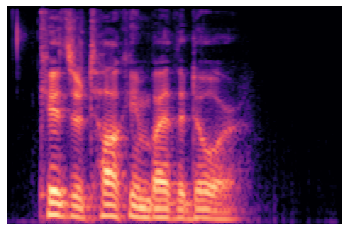

In [194]:
# !pip install librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt
# path_save = r'C:\Users\Olia\Desktop\Lips Reading\Day5(Video+Audio_camera, CPU)\CNN_Checkpoints\test_spec.jpeg'
path_load = '/content/gdrive/MyDrive/From Motion to Emotion/03-01-01-01-01-01-01.wav'
y, sr = librosa.load(path_load)
y, index = librosa.effects.trim(y)
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
spectrogram = librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
# plt.savefig(path_save)
# plt.savefig('test.png')
#plt.plot(spectrogram)
plt.axis('off');
plt.savefig('sample.jpeg')

## predict with trained model

In [ ]:
# # saving model code 
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location')

In [215]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/From Motion to Emotion/CNN_model.h5')

In [240]:
image = tf.keras.utils.load_img('sample.jpeg', target_size=(256, 256)) #YOUR IMAGE PSATH
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
predictions

1/1 [==============================] - 0s 233ms/step


array([[0.13846445, 0.52056265, 0.06018782, 0.09036848, 0.04826851,
        0.10579935, 0.0363487 ]], dtype=float32)

In [249]:
df_spect = pd.DataFrame(predictions, columns = ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'])
df_spect = df_spect.T
df_spect.sort_values(by=0, inplace = True, ascending=False)
df_spect.reset_index(inplace=True)
df_spect.rename(columns = {'index': 'Emotion', 0:'Percentage'}, inplace = True)
df_spect['Percentage'] = df_spect['Percentage']*100
df_spect

In [251]:
df_spect.Percentage[0]

52.056267

In [218]:
# Define a sample one-hot encoding
##onehot_encoded = np.array(["PREDICTION"]) #[1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1]])

# Get the indices where the values are 1
##index_of_max = np.argmax(onehot_encoded, axis=1)

# Create a list of labels to match the indices
labels = ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Use the indices to get the labels
decoded_labels = [labels[max_index]]# for index in index_of_max]

# The decoded labels
print(decoded_labels)

['disgust']
